In [1]:
#importing dependencies

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
#load data into dataframe
train=pd.read_csv(r"C:\Users\DELL\Documents\Snehal DS\Snehal Projects\Delinquent or NonDelinquent  customer prediction\training.csv")
test=pd.read_csv(r"C:\Users\DELL\Documents\Snehal DS\Snehal Projects\Delinquent or NonDelinquent  customer prediction\test.csv")

In [3]:
#Data Understanding and preprocessing
train.shape

(150000, 12)

In [4]:
test.shape

(101503, 12)

In [5]:
train.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [6]:
test.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,NaN,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
1,2,NaN,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
2,3,NaN,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
3,4,NaN,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
4,5,NaN,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0


In [7]:
train=train.drop(["Unnamed: 0"],axis=1)
test=test.drop(["Unnamed: 0"],axis=1)

In [8]:
#Check for duplicates
train.duplicated().value_counts()

False    149391
True        609
dtype: int64

In [9]:
train_redup=train.drop_duplicates()

In [10]:
train_redup.duplicated().value_counts()

False    149391
dtype: int64

In [11]:
train_redup.shape

(149391, 11)

In [12]:
#Checking null values
train_redup.isnull().sum()

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29221
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3828
dtype: int64

In [13]:
#calculate percentage of misssing value
def FindMiss(df):
    return round(df.isnull().sum()/df.shape[0]*100,2)

In [14]:
FindMiss(train_redup)

SeriousDlqin2yrs                         0.00
RevolvingUtilizationOfUnsecuredLines     0.00
age                                      0.00
NumberOfTime30-59DaysPastDueNotWorse     0.00
DebtRatio                                0.00
MonthlyIncome                           19.56
NumberOfOpenCreditLinesAndLoans          0.00
NumberOfTimes90DaysLate                  0.00
NumberRealEstateLoansOrLines             0.00
NumberOfTime60-89DaysPastDueNotWorse     0.00
NumberOfDependents                       2.56
dtype: float64

In [15]:
train_redup[train_redup.NumberOfDependents.isnull()]

#here we can see that when there is missing value in "NumberOfDependents" then there is missing value in "MonthlyIncome" also


,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
8,0,0.116951,27,0,46.0,NaN,2,0,0,0,NaN
96,0,0.542243,48,2,10.0,NaN,2,0,0,0,NaN
109,0,0.041258,61,0,4739.0,NaN,11,0,4,0,NaN
159,0,0.000000,63,0,2.0,NaN,4,0,0,0,NaN
238,0,1.000000,28,0,0.0,NaN,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
149826,0,0.027319,71,0,1419.0,NaN,13,0,1,0,NaN
149854,0,0.056589,75,0,8.0,NaN,3,0,0,0,NaN
149894,0,0.017904,55,0,1058.0,NaN,8,0,1,1,NaN
149948,0,0.055530,27,0,10.0,NaN,1,0,0,0,NaN


In [16]:
train_redup[train_redup.MonthlyIncome.isnull()]

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
6,0,0.305682,57,0,5710.0,NaN,8,0,3,0,0.0
8,0,0.116951,27,0,46.0,NaN,2,0,0,0,NaN
16,0,0.061086,78,0,2058.0,NaN,10,0,2,0,0.0
32,0,0.083418,62,0,977.0,NaN,6,0,1,0,0.0
41,0,0.072898,81,0,75.0,NaN,7,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
149976,0,0.000627,76,0,60.0,NaN,5,0,0,0,0.0
149977,0,0.236450,29,0,349.0,NaN,3,0,0,0,0.0
149984,0,0.037548,84,0,25.0,NaN,5,0,0,0,0.0
149992,0,0.871976,50,0,4132.0,NaN,11,0,1,0,3.0


In [17]:
train_redup["NumberOfDependents"].agg(["mode"])
#it means most of the rows has 0 dependants

,mode
0,0.0


In [18]:
train_redup["NumberOfDependents"].value_counts()
#most of the customer have zero dependants

0.0     86392
1.0     26314
2.0     19521
3.0      9483
4.0      2862
5.0       746
6.0       158
7.0        51
8.0        24
10.0        5
9.0         5
20.0        1
13.0        1
Name: NumberOfDependents, dtype: int64

In [19]:
#here we can see that when there is missing value in "NumberOfDependents" then there is missing value in "MonthlyIncome" also
#so we are replacing missing values of "MonthlyIncome" column with 0 if we put anoother value it may misslead

In [20]:
#when "NumberOfDependents" is null
fam_miss=train_redup[train_redup.NumberOfDependents.isnull()]

In [21]:
#when "NumberOfDependents" is notnull
fam_nmiss=train_redup[train_redup.NumberOfDependents.notnull()]

In [22]:
#when "NumberOfDependents" are missing then replace that with 0 in "NumberOfDependents" column
fam_miss["NumberOfDependents"] = fam_miss["NumberOfDependents"].fillna(0)

#when "NumberOfDependents" are missing then replace it with 0 in column "MonthlyIncome"
fam_miss["MonthlyIncome"] = fam_miss["MonthlyIncome"].fillna(0)

C:\Users\DELL\AppData\Local\Temp/ipykernel_8904/2310187038.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fam_miss["NumberOfDependents"] = fam_miss["NumberOfDependents"].fillna(0)
C:\Users\DELL\AppData\Local\Temp/ipykernel_8904/2310187038.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fam_miss["MonthlyIncome"] = fam_miss["MonthlyIncome"].fillna(0)


In [23]:
FindMiss(fam_miss)

SeriousDlqin2yrs                        0.0
RevolvingUtilizationOfUnsecuredLines    0.0
age                                     0.0
NumberOfTime30-59DaysPastDueNotWorse    0.0
DebtRatio                               0.0
MonthlyIncome                           0.0
NumberOfOpenCreditLinesAndLoans         0.0
NumberOfTimes90DaysLate                 0.0
NumberRealEstateLoansOrLines            0.0
NumberOfTime60-89DaysPastDueNotWorse    0.0
NumberOfDependents                      0.0
dtype: float64

In [24]:
FindMiss(fam_nmiss)

SeriousDlqin2yrs                         0.00
RevolvingUtilizationOfUnsecuredLines     0.00
age                                      0.00
NumberOfTime30-59DaysPastDueNotWorse     0.00
DebtRatio                                0.00
MonthlyIncome                           17.44
NumberOfOpenCreditLinesAndLoans          0.00
NumberOfTimes90DaysLate                  0.00
NumberRealEstateLoansOrLines             0.00
NumberOfTime60-89DaysPastDueNotWorse     0.00
NumberOfDependents                       0.00
dtype: float64

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MonthlyIncome'>

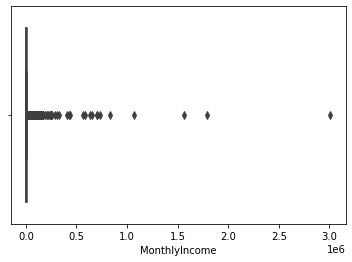

In [25]:
#as there are some outliers so we cant replace it with mean so replacing "MonthlyIncome" with median where "NumberOfDependents" is not null
sns.boxplot(fam_nmiss["MonthlyIncome"])


In [26]:
fam_nmiss["MonthlyIncome"]=fam_nmiss["MonthlyIncome"].fillna(fam_nmiss["MonthlyIncome"].median())

C:\Users\DELL\AppData\Local\Temp/ipykernel_8904/83908473.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fam_nmiss["MonthlyIncome"]=fam_nmiss["MonthlyIncome"].fillna(fam_nmiss["MonthlyIncome"].median())


In [27]:
FindMiss(fam_nmiss)

SeriousDlqin2yrs                        0.0
RevolvingUtilizationOfUnsecuredLines    0.0
age                                     0.0
NumberOfTime30-59DaysPastDueNotWorse    0.0
DebtRatio                               0.0
MonthlyIncome                           0.0
NumberOfOpenCreditLinesAndLoans         0.0
NumberOfTimes90DaysLate                 0.0
NumberRealEstateLoansOrLines            0.0
NumberOfTime60-89DaysPastDueNotWorse    0.0
NumberOfDependents                      0.0
dtype: float64

In [28]:
#combining both fam_nmiss and fam_miss dataframe
filled_train=fam_miss.append(fam_nmiss)


In [29]:
filled_train.shape

(149391, 11)

In [30]:
#Data Analysis
filled_train.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
8,0,0.116951,27,0,46.0,0.0,2,0,0,0,0.0
96,0,0.542243,48,2,10.0,0.0,2,0,0,0,0.0
109,0,0.041258,61,0,4739.0,0.0,11,0,4,0,0.0
159,0,0.000000,63,0,2.0,0.0,4,0,0,0,0.0
238,0,1.000000,28,0,0.0,0.0,0,0,0,0,0.0


In [31]:
#column="SeriousDlqin2yrs" find praportion of defaulter and non defaulter
#percentage of defaulter and non defaulter
filled_train.groupby(["SeriousDlqin2yrs"]).size()/filled_train.shape[0]

SeriousDlqin2yrs
0    0.933001
1    0.066999
dtype: float64

In [32]:
#column="RevolvingUtilizationOfUnsecuredLines"
filled_train.RevolvingUtilizationOfUnsecuredLines.describe()

count    149391.000000
mean          6.071087
std         250.263672
min           0.000000
25%           0.030132
50%           0.154235
75%           0.556494
max       50708.000000
Name: RevolvingUtilizationOfUnsecuredLines, dtype: float64

In [33]:
filled_train.RevolvingUtilizationOfUnsecuredLines.quantile([0.99])

0.99    1.093922
Name: RevolvingUtilizationOfUnsecuredLines, dtype: float64

In [34]:
filled_train[filled_train['RevolvingUtilizationOfUnsecuredLines']<1].describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,146053.000000,146053.000000,146053.000000,146053.000000,146053.000000,1.460530e+05,146053.000000,146053.000000,146053.000000,146053.000000,146053.000000
mean,0.060033,0.302913,52.494827,0.379739,356.946590,6.312113e+03,8.529246,0.229026,1.030188,0.207514,0.736664
std,0.237549,0.336767,14.715735,3.890212,2060.104556,1.308137e+04,5.148874,3.863995,1.132337,3.851532,1.105854
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.028834,42.000000,0.000000,0.177355,3.640000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.144441,52.000000,0.000000,0.368084,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.517573,63.000000,0.000000,0.877956,7.453000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,1.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [35]:
filled_train[filled_train['RevolvingUtilizationOfUnsecuredLines']>1].groupby(["SeriousDlqin2yrs"]).size()

SeriousDlqin2yrs
0    2084
1    1237
dtype: int64

In [36]:
#droping values >10 from "RevolvingUtilizationOfUnsecuredLines" columns
util_drop=filled_train.drop(filled_train[filled_train["RevolvingUtilizationOfUnsecuredLines"]>10].index)

In [37]:
util_drop.shape

(149150, 11)

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

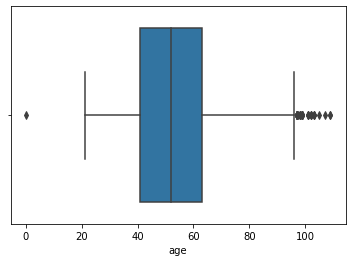

In [38]:
#column="age"
sns.boxplot(util_drop["age"])

In [39]:
#column="NumberOfTime30-59DaysPastDueNotWorse"
util_drop.groupby(["NumberOfTime30-59DaysPastDueNotWorse"]).size()

NumberOfTime30-59DaysPastDueNotWorse
0     125239
1      16020
2       4588
3       1750
4        747
5        342
6        140
7         54
8         25
9         12
10         4
11         1
12         2
13         1
96         5
98       220
dtype: int64

In [40]:
util_drop.groupby(["NumberOfTimes90DaysLate"]).size()

NumberOfTimes90DaysLate
0     140875
1       5227
2       1554
3        666
4        291
5        131
6         80
7         38
8         20
9         19
10         8
11         5
12         2
13         4
14         2
15         2
17         1
96         5
98       220
dtype: int64

In [41]:
util_drop.groupby(["NumberOfTime60-89DaysPastDueNotWorse"]).size()

NumberOfTime60-89DaysPastDueNotWorse
0     141601
1       5723
2       1117
3        318
4        104
5         34
6         16
7          8
8          2
9          1
11         1
96         5
98       220
dtype: int64

In [42]:
util_drop[util_drop["NumberOfTimes90DaysLate"]>=96].groupby(["SeriousDlqin2yrs"]).size()

SeriousDlqin2yrs
0     89
1    136
dtype: int64

In [43]:
#column ="DebtRatio"
util_drop["DebtRatio"].describe()

count    149150.000000
mean        354.085328
std        2042.235713
min           0.000000
25%           0.177334
50%           0.368200
75%           0.874241
max      329664.000000
Name: DebtRatio, dtype: float64

<AxesSubplot:xlabel='DebtRatio', ylabel='Density'>

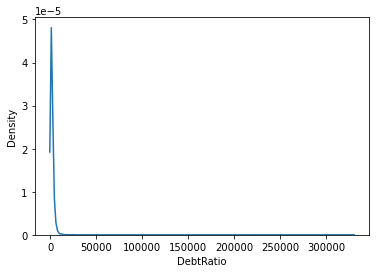

In [44]:
sns.kdeplot(util_drop["DebtRatio"])

In [45]:
util_drop["DebtRatio"].quantile([0.97])

0.97    3229.53
Name: DebtRatio, dtype: float64

In [46]:
temp=util_drop[(util_drop["DebtRatio"]>3492) & (util_drop["SeriousDlqin2yrs"]==util_drop["MonthlyIncome"])]

In [47]:
temp["SeriousDlqin2yrs"].value_counts()

0    380
1      2
Name: SeriousDlqin2yrs, dtype: int64

In [48]:
#lets delete this records
dratio=util_drop.drop(util_drop[(util_drop["DebtRatio"]>3492) & (util_drop["SeriousDlqin2yrs"]==util_drop["MonthlyIncome"])].index)

In [49]:
dratio["SeriousDlqin2yrs"].value_counts()

0    138778
1      9990
Name: SeriousDlqin2yrs, dtype: int64

In [50]:
#handle imbalnce data
#saperate defaulters and non defaulters

default=dratio[dratio.SeriousDlqin2yrs==0]
ndefault=dratio[dratio.SeriousDlqin2yrs==1]

In [51]:
#using undersampling technique to handle imbalance dataset
#built dataset containing similar distribution of defaulters and non defaulters
default_sample=default.sample(n=9990)

In [52]:
print(default_sample.shape)

(9990, 11)


In [53]:
#concatenate two dataframe
ndataset=pd.concat([default_sample,ndefault],axis=0)

In [54]:
ndataset["SeriousDlqin2yrs"].value_counts()

0    9990
1    9990
Name: SeriousDlqin2yrs, dtype: int64

In [55]:
#Apply Development -we sected XGboost model because
#we have have large number of observations in training data.
#and we have imbalance data

!pip install xgboost

In [56]:

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import xgboost as xgb

## Model devlopment before handling imbalace data

In [76]:
#spliting data inti input and output
x=dratio.drop(['SeriousDlqin2yrs'],axis=1)
y=dratio["SeriousDlqin2yrs"]

In [77]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, stratify=y)

In [78]:
model=xgb.XGBClassifier(tree_method="exact")

In [79]:
model.fit(x,y.values.ravel())

C:\Users\DELL\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:27:12] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [80]:
y_pred=model.predict(x)

In [81]:
accuracy_score(y,y_pred)

0.9465879759087976

In [82]:
cm=confusion_matrix(y,y_pred)
cm

array([[137977,    801],
       [  7145,   2845]], dtype=int64)

Text(33.0, 0.5, 'Actual')

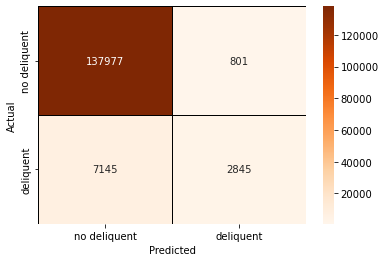

In [83]:
sns.heatmap(cm,annot=True,fmt='d',cmap="Oranges",linewidth=0.5,linecolor="black")
plt.xticks(np.arange(2)+.5,["no deliquent", "deliquent"])
plt.yticks(np.arange(2)+.5,["no deliquent", "deliquent"])
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [65]:
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97    138778
           1       0.78      0.28      0.42      9990

    accuracy                           0.95    148768
   macro avg       0.87      0.64      0.69    148768
weighted avg       0.94      0.95      0.93    148768



## Model devlopment after handling imbalace data by undersampling method

In [84]:
#spliting data inti input and output
x=ndataset.drop(['SeriousDlqin2yrs'],axis=1)
y=ndataset["SeriousDlqin2yrs"]

In [85]:
model=xgb.XGBClassifier(tree_method="exact")

In [86]:
model.fit(x,y.values.ravel())

C:\Users\DELL\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:28:21] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [87]:
y_pred=model.predict(x)

In [88]:
accuracy_score(y,y_pred)

0.8603103103103104

In [89]:
cm=confusion_matrix(y,y_pred)
cm

array([[8753, 1237],
       [1554, 8436]], dtype=int64)

Text(33.0, 0.5, 'Actual')

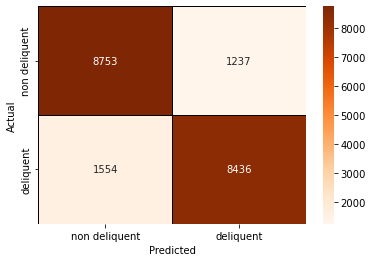

In [90]:
sns.heatmap(cm,annot=True,fmt='d',cmap="Oranges",linewidth=0.5,linecolor="black")
plt.xticks(np.arange(2)+.5,["non deliquent", "deliquent"])
plt.yticks(np.arange(2)+.5,["non deliquent", "deliquent"])
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [91]:
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.88      0.86      9990
           1       0.87      0.84      0.86      9990

    accuracy                           0.86     19980
   macro avg       0.86      0.86      0.86     19980
weighted avg       0.86      0.86      0.86     19980



## Making predictive system

In [92]:
#input data for prediction
input_data=(0.957151019,40,0,0.121876201,2600,4,0,0,0,1)

#Changing the input data to a numpy array
input_data_as_numpy_array=np.asarray(input_data)

#reshape the numpy array as we are predicting for one instance
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)

prediction=model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 1):
  print('The Customer is Deliquent')
else:
  print('The Customer is Non Deliquent')

[0]
The Customer is Non Deliquent


In [93]:
#input data for prediction
input_data=(0.964672555,40,3,0.382964747,13700,9,3,1,1,2)

#Changing the input data to a numpy array
input_data_as_numpy_array=np.asarray(input_data)

#reshape the numpy array as we are predicting for one instance
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)

prediction=model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 1):
  print('The Customer is Deliquent')
else:
  print('The Customer is Non Deliquent')

[1]
The Customer is Deliquent
